# **PROJECT NAME** **- Integrated Retail Analytics for Store Optimization**

### **Project Type** - Exploratory Data Analysis (EDA) + Regression

### **Contribution** - Individual

# **📌Project Summary :**

This project aims to optimize store operations and boost sales performance by leveraging machine learning techniques.

We use three datasets :

1.  **Sales Data** – weekly sales of different stores.

2.  **Store Data** – information about store type and size.

3.  **Features Data** – external factors such as holidays, fuel prices, temperature, and CPI.

By integrating these datasets, we build a predictive model that estimates weekly sales.
This helps in:

*  Identifying key drivers of sales.

*  Supporting decision-making in store operations.

*  Improving forecasting accuracy for resource allocation.

# **📊INSIGHTS :**

**🔹 1. Exploratory Data Analysis (EDA) Insights**

Sales are highly skewed — most stores have moderate sales, but a few weeks show very high spikes.
This suggests outliers (holiday weeks or promotions).


**🔹 2. Feature Engineering & Model Insights**

Previous week’s sales is one of the strongest predictors — sales are highly autocorrelated. Short-term rolling averages smooth out spikes and improve stability of forecasts.

**🔹 3. Business Insights**

Holiday weeks can double sales → stores must plan extra inventory, staffing, and promotions.Larger stores (higher Size) consistently outperform smaller ones.
If resources are limited, expanding store size or converting smaller stores to larger formats may maximize returns.

# **🔗GitHub Link**

https://github.com/tonujaramesh/Integrated_Retail_Analytics_for_Store_Optimization

# **🔍Problem Statement**

Retailers face challenges in accurately forecasting sales due to seasonal variations, holiday impacts, economic factors, and store-specific characteristics. Poor sales forecasting leads to:

*  **Stockouts**, causing missed revenue opportunities and dissatisfied customers.

*  **Overstocking**, resulting in increased storage costs and product wastage.

*  **Inefficient resource allocation**, such as staffing and promotional planning.

The problem is to predict weekly sales for different stores and departments by integrating:

* Historical sales data (store-level weekly performance),

* Store attributes (type, size), and

* External features (holidays, fuel prices, temperature, CPI, unemployment).

The goal is to develop a machine learning regression model that accurately forecasts weekly sales, identifies key sales drivers, and provides actionable insights to **optimize store operations**, **inventory management**, and **strategic planning**.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Dataset Loading

In [2]:
# Dataset [1]
features = pd.read_csv("Features data set.csv")
# Dataset [2]
sales = pd.read_csv("sales data-set.csv")
# Dataset [3]
stores = pd.read_csv("stores data-set.csv")

# Dataset Rows & Columns

### Dataset[1] - Features



In [3]:
print('Features rows,cols:', features.shape)
print(features.columns)

Features rows,cols: (8190, 12)
Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')


### Dataset[2] - Sales

In [4]:
print('Sales rows,cols   :', sales.shape)
print(sales.columns)

Sales rows,cols   : (421570, 5)
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')


### Dataset[3] - Stores

In [5]:
print('Stores rows,cols  :', stores.shape)
print(stores.columns)

Stores rows,cols  : (45, 3)
Index(['Store', 'Type', 'Size'], dtype='object')


# Merge Datasets

In [6]:
df = pd.merge(sales, stores, on="Store", how="left")
df = pd.merge(df, features, on=["Store", "Date"], how="left")

print("Merged dataset shape:", df.shape)

Merged dataset shape: (421570, 17)


# Dataset First View

In [7]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,05/02/2010,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,12/02/2010,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,19/02/2010,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,26/02/2010,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,05/03/2010,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


# Data Information

### Dataset[1] - Features

In [8]:
print('\nFeatures info:')
features.info()


Features info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


### Dataset[2] - Sales

In [9]:
print('\nSales info:')
sales.info()


Sales info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


### Dataset[3] - Stores

In [10]:
print('\nStores info:')
stores.info()


Stores info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


# Duplicate Values

In [11]:
# Features dataset - key duplicates by Store + Date
dup_features = features[features.duplicated(subset=['Store','Date'], keep=False)]
print("🔹 Features Dataset Duplicates:", dup_features.shape[0])
if not dup_features.empty:
    display(dup_features.head())

# Sales dataset - key duplicates by Store + Dept + Date
dup_sales = sales[sales.duplicated(subset=['Store','Dept','Date'], keep=False)]
print("🔹 Sales Dataset Duplicates:", dup_sales.shape[0])
if not dup_sales.empty:
    display(dup_sales.head())

# Stores dataset - key duplicates by Store
dup_stores = stores[stores.duplicated(subset=['Store'], keep=False)]
print("🔹 Stores Dataset Duplicates:", dup_stores.shape[0])
if not dup_stores.empty:
    display(dup_stores.head())


🔹 Features Dataset Duplicates: 0
🔹 Sales Dataset Duplicates: 0
🔹 Stores Dataset Duplicates: 0


There is no such duplicates values in these three dataset.

# Dataset Description

There are three datasets: Sales, Stores, and Features, which need to be merged for analysis and modeling.


**🔹 1. Features Dataset**

The Features dataset provides external conditions and promotional information for each store and each week. It has **8,190 rows** and **12 columns**.

The main columns are:

1. **Store** – The store ID, which links with the other datasets.

2. **Date** – The week-ending date, which links with the Sales dataset.

3. **Temperature** – The average weekly temperature in that region. Weather can influence customer shopping behavior.

4. **Fuel Price** – The average fuel price. When fuel prices rise, customers may reduce their shopping trips.

5. **IsHoliday** – Again, a holiday flag, because external datasets also record whether a week had a holiday.

6. **CPI (Consumer Price Index)** – This is an economic indicator that represents inflation. High inflation can affect customer purchasing power.

7. **Unemployment** – The unemployment rate in the region. If unemployment is high, people may spend less, which directly affects sales.

So, the Features dataset tells us about the economic environment, promotions, and external conditions around the sales.


🔹 **2. Sales Dataset**

This is our main dataset, because it contains the actual sales values that we want to predict.

It has about 421,000 rows and 5 columns.

The important columns are:

1. **Store** – This tells us which store the record belongs to. Each store has a unique ID.

2. **Dept** – Inside each store, there are multiple departments. This column specifies which department the sales are for.

3. **Date** – This is the week-ending date for the sales record. It helps us analyze sales trends over time.

4. **Weekly_Sales** – This is the most important column, because it represents the amount of sales for that week. This is our target variable for prediction.

5. **IsHoliday** – This is a Boolean column that tells us whether the given week had a holiday. This is important because holiday weeks usually see a spike in sales.

So, the Sales dataset tells us what was sold, where it was sold, and when it was sold.

🔹 **3. Stores Dataset**

The Stores dataset provides background information about each store.

It has 45 rows and 3 columns.

The columns are:

1. **Store** – The unique ID of the store, which helps us connect this dataset with the sales data.

2. **Type** – Each store is categorized into Type A, B, or C. Usually, Type A stores are larger and have more departments, while B and C are medium or smaller in size.

3. **Size** – This is the size of the store in square feet. Larger stores typically have higher sales potential compared to smaller ones.

So, this dataset tells us what kind of store it is and how big it is, which are important factors for predicting sales.

In [12]:
# Dataset[1]
display(features.describe(include='all').T)
# Dataset[2]
display(sales.describe(include='all').T)
# Dataset[3]
display(stores.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Store,8190.0,NaN,NaN,NaN,23.0,12.987966,1.0,12.0,23.0,34.0,45.0
Date,8190,182,05/02/2010,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,8190.0,NaN,NaN,NaN,59.356198,18.678607,-7.29,45.9025,60.71,73.88,101.95
Fuel_Price,8190.0,NaN,NaN,NaN,3.405992,0.431337,2.472,3.041,3.513,3.743,4.468
MarkDown1,4032.0,NaN,NaN,NaN,7032.371786,9262.747448,-2781.45,1577.5325,4743.58,8923.31,103184.98
MarkDown2,2921.0,NaN,NaN,NaN,3384.176594,8793.583016,-265.76,68.88,364.57,2153.35,104519.54
MarkDown3,3613.0,NaN,NaN,NaN,1760.10018,11276.462208,-179.26,6.6,36.26,163.15,149483.31
MarkDown4,3464.0,NaN,NaN,NaN,3292.935886,6792.329861,0.22,304.6875,1176.425,3310.0075,67474.85
MarkDown5,4050.0,NaN,NaN,NaN,4132.216422,13086.690278,-185.17,1440.8275,2727.135,4832.555,771448.1
CPI,7605.0,NaN,NaN,NaN,172.460809,39.738346,126.064,132.364839,182.764003,213.932412,228.976456


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Store,421570.0,NaN,NaN,NaN,22.200546,12.785297,1.0,11.0,22.0,33.0,45.0
Dept,421570.0,NaN,NaN,NaN,44.260317,30.492054,1.0,18.0,37.0,74.0,99.0
Date,421570,143,23/12/2011,3027,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weekly_Sales,421570.0,NaN,NaN,NaN,15981.258123,22711.183519,-4988.94,2079.65,7612.03,20205.8525,693099.36
IsHoliday,421570,2,False,391909,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Store,45.0,NaN,NaN,NaN,23.0,13.133926,1.0,12.0,23.0,34.0,45.0
Type,45,3,A,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,45.0,NaN,NaN,NaN,130287.6,63825.271991,34875.0,70713.0,126512.0,202307.0,219622.0


# Missing Values / Null Values Count

In [13]:
def missing_summary(df, name):
    print(f'--- {name} ---')
    miss = df.isnull().sum().sort_values(ascending=False)
    miss_pct = (miss / len(df) * 100).round(2)
    display(pd.concat([miss, miss_pct], axis=1, keys=['MissingCount','MissingPct']).head(30))

# Dataset[1]
missing_summary(features, 'Features')
# Dataset[2]
missing_summary(sales, 'Sales')
# Dataset[3]
missing_summary(stores, 'Stores')


--- Features ---


,MissingCount,MissingPct
MarkDown2,5269,64.33
MarkDown4,4726,57.70
MarkDown3,4577,55.89
MarkDown1,4158,50.77
MarkDown5,4140,50.55
CPI,585,7.14
Unemployment,585,7.14
Store,0,0.00
Fuel_Price,0,0.00
Temperature,0,0.00


--- Sales ---


,MissingCount,MissingPct
Store,0,0.0
Dept,0,0.0
Date,0,0.0
Weekly_Sales,0,0.0
IsHoliday,0,0.0


--- Stores ---


,MissingCount,MissingPct
Store,0,0.0
Type,0,0.0
Size,0,0.0


# Visualizing the missing values

###Heatmaps of nulls for dataset [1]

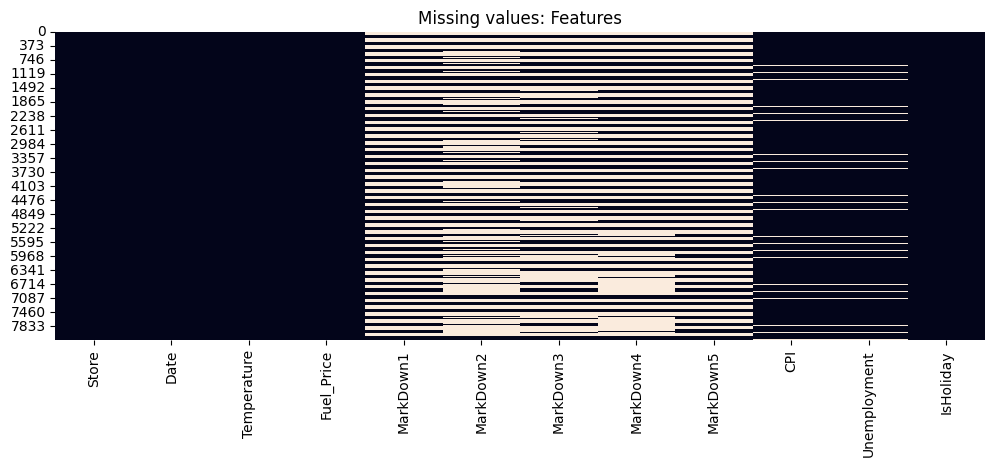

In [14]:

plt.figure(figsize=(12,4))
sns.heatmap(features.isnull(), cbar=False)
plt.title('Missing values: Features')
plt.show()

### Heatmaps of nulls for dataset [2]

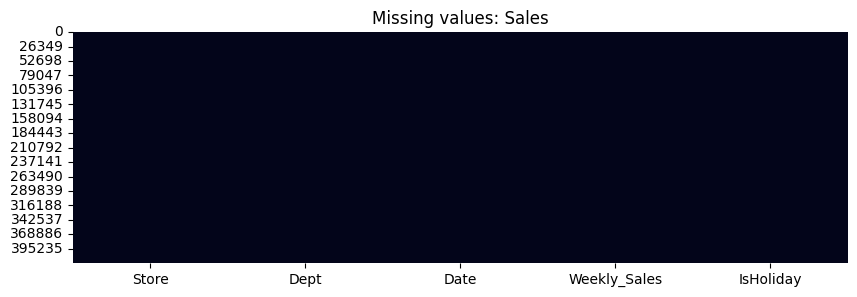

In [15]:
plt.figure(figsize=(10,3))
sns.heatmap(sales.isnull(), cbar=False)
plt.title('Missing values: Sales')
plt.show()


### Heatmaps of nulls for dataset [3]

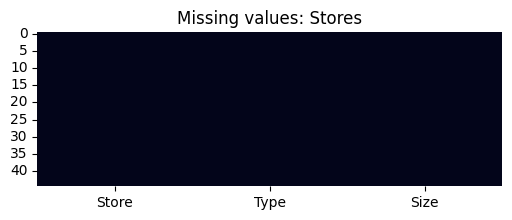

In [16]:
plt.figure(figsize=(6,2))
sns.heatmap(stores.isnull(), cbar=False)
plt.title('Missing values: Stores')
plt.show()

# Unique Values of all 3 datset

In [17]:
# Features dataset
print("Features Dataset - Unique Values")
for col in features.columns:
    print(f"{col} -> {features[col].unique()[:10]} ...")

# Sales dataset
print("\nSales Dataset - Unique Values")
for col in sales.columns:
    print(f"{col} -> {sales[col].unique()[:10]} ...")

# Stores dataset
print("\nStores Dataset - Unique Values")
for col in stores.columns:
    print(f"{col} -> {stores[col].unique()[:10]} ...")


Features Dataset - Unique Values
Store -> [ 1  2  3  4  5  6  7  8  9 10] ...
Date -> ['05/02/2010' '12/02/2010' '19/02/2010' '26/02/2010' '05/03/2010'
 '12/03/2010' '19/03/2010' '26/03/2010' '02/04/2010' '09/04/2010'] ...
Temperature -> [42.31 38.51 39.93 46.63 46.5  57.79 54.58 51.45 62.27 65.86] ...
Fuel_Price -> [2.572 2.548 2.514 2.561 2.625 2.667 2.72  2.732 2.719 2.77 ] ...
MarkDown1 -> [     nan 10382.9   6074.12   410.31  5629.51  4640.65  5011.32  2725.36
  5762.1   6277.39] ...
MarkDown2 -> [         nan 6.115670e+03 2.543900e+02 9.800000e+01 6.800000e+01
 1.900000e+01 6.700000e+01 4.048000e+01 4.601138e+04 2.181316e+04] ...
MarkDown3 -> [         nan 2.150700e+02 5.198000e+01 5.580551e+04 1.398110e+03
 1.050200e+02 3.473700e+02 6.347000e+02 2.603600e+02 1.431000e+02] ...
MarkDown4 -> [    nan 2406.62  427.39    8.   2084.64 3639.42  225.79   24.9   983.65
 1450.13] ...
MarkDown5 -> [     nan  6551.42  5988.57   554.92 20475.32 14461.82  4011.37  2739.43
  4735.78  8483.  ] 

# Data Visualization

Data Visualization is the process of representing raw data in the form of charts and graphs.Instead of just looking at tables of numbers, we use plots to find patterns, trends, and relationships in the data.

It helps us understand the story behind the data before building any machine learning model.


# Experimenting with Charts

Using different types of data visualizations to explore the datasets, identify patterns, and gain insights.

In [18]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,05/02/2010,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,12/02/2010,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,19/02/2010,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,26/02/2010,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,05/03/2010,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


# Chart - 1

### **(i) Histogram – Distribution of Weekly Sales**

This histogram shows the distribution of weekly sales across all stores and departments.

In [35]:
print("Distribution of Weekly Sales Counts:  ")
print(df["Weekly_Sales"].value_counts())
print("\n")

Distribution of Weekly Sales Counts:  
Weekly_Sales
10.00      353
5.00       289
20.00      232
15.00      215
12.00      175
          ... 
2184.65      1
2667.10      1
2473.51      1
3414.45      1
2246.25      1
Name: count, Length: 359464, dtype: int64




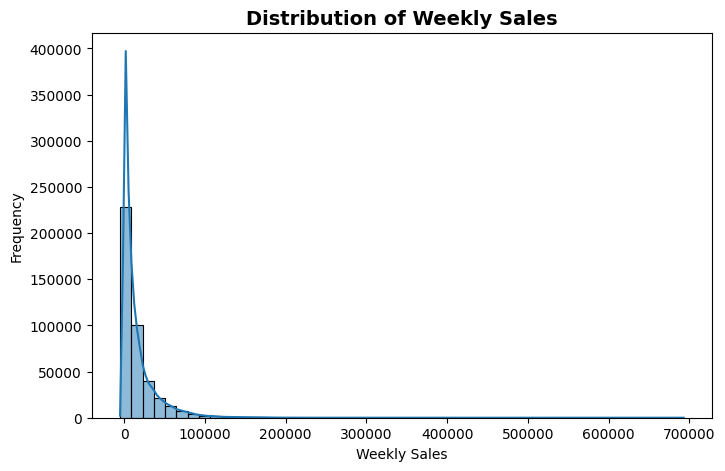

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(sales['Weekly_Sales'], bins=50, kde=True)
plt.title("Distribution of Weekly Sales", fontsize=14, fontweight = 'bold')
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()

### **Insights:**

* Most weekly sales fall in the lower range (right-skewed distribution).

* A few departments have very high weekly sales (outliers).

* Indicates variability in demand between departments.

### **(ii) Histogram – Store Sizes**

Distribution of physical store sizes.

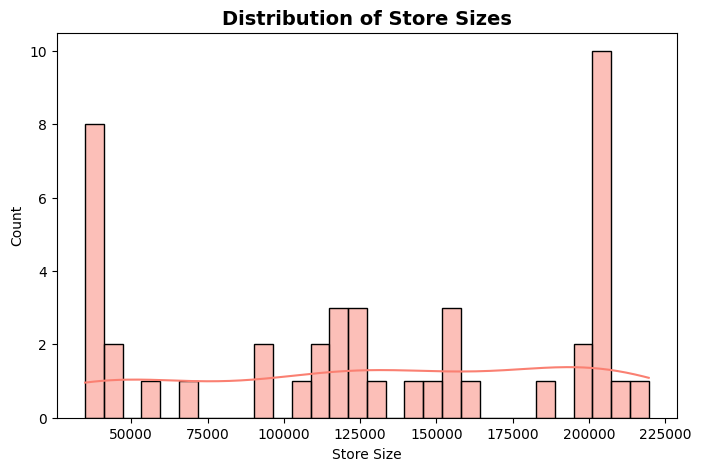

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(stores['Size'], bins=30, kde=True, color="salmon")
plt.title("Distribution of Store Sizes", fontsize=14, weight='bold')
plt.xlabel("Store Size")
plt.ylabel("Count")
plt.show()

### **Insights :**

* Sizes vary widely, with some very large stores.
* Confirms why bigger stores generate higher sales.

# Chart - 2

### **(i) Box Plot – Sales Distribution by Store Type**

Box plot comparing the spread of sales across Store Types (A, B, C).

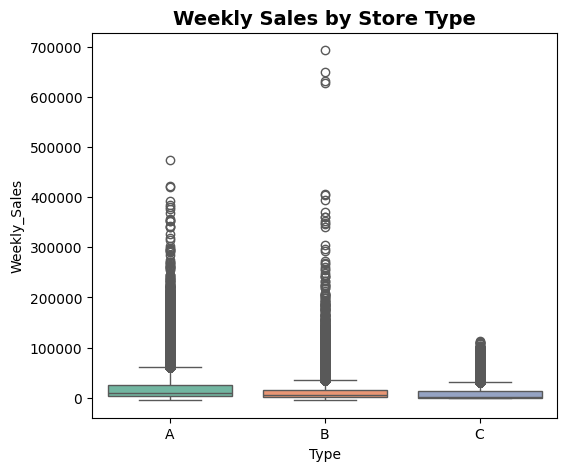

In [22]:
plt.figure(figsize=(6,5))
sns.boxplot(x="Type", y="Weekly_Sales",hue = "Type", data=sales.merge(stores, on="Store"), palette="Set2", legend=False)
plt.title("Weekly Sales by Store Type", fontsize=14, fontweight='bold')
plt.show()

### **Insights:**

*  Type A stores (larger) show higher median sales and wider spread.

*  Smaller stores (Type C) have lower but more consistent sales.

*  Confirms store size and type are important predictors.

### **(ii) Boxplot – Weekly Sales: Holiday vs Non-Holiday**

Shows how weekly sales differ between holiday and non-holiday periods.

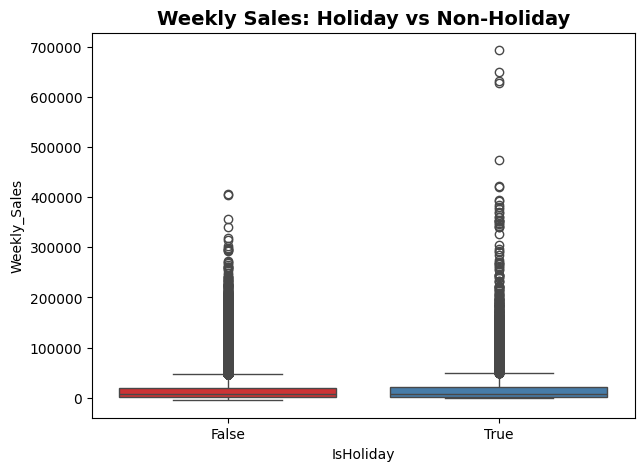

In [23]:
plt.figure(figsize=(7,5))
sns.boxplot(x="IsHoliday", y="Weekly_Sales", hue="IsHoliday", data=sales, palette="Set1", legend=False)
plt.title("Weekly Sales: Holiday vs Non-Holiday", fontsize=14, weight='bold')
plt.show()


### **Insights:**

* Holiday weeks have higher median and wider spread.

* Outliers (huge sales peaks) only appear during holidays → linked to Black Friday, Christmas, Thanksgiving.

* Confirms seasonality is essential in forecasting.

# Chart - 3

### **(i) Bar Plot – Average Sales by Store Type**

Bar plot of average weekly sales per store type.

In [37]:
print("Average Weekly Sales Counts:")
print(df["Type"].value_counts())
print("\n")

Average Weekly Sales Counts:
Type
A    215478
B    163495
C     42597
Name: count, dtype: int64




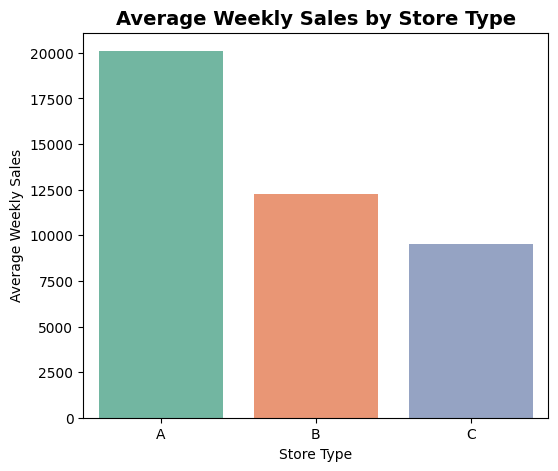

In [24]:
avg_sales_type = sales.merge(stores, on="Store").groupby("Type")['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(6,5))
sns.barplot(x="Type", y="Weekly_Sales",hue="Type" ,data=avg_sales_type, palette="Set2",legend=False)
plt.title("Average Weekly Sales by Store Type", fontsize=14, weight='bold')
plt.xlabel("Store Type")
plt.ylabel("Average Weekly Sales")
plt.show()


### **Insights:**

* Type A stores contribute the most to overall sales.

* Smaller store types generate less revenue, highlighting size as a major driver.

### **(ii) Bar Plot – Average Sales in Holiday vs Non-Holiday Weeks**

Comparison of average weekly sales between holiday and regular weeks.

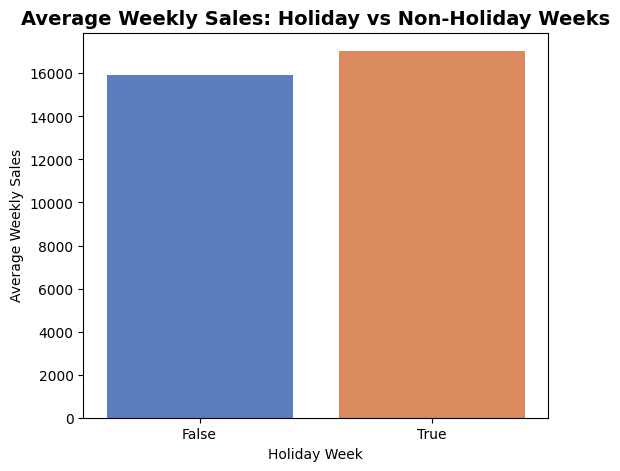

In [25]:
avg_sales_holiday = df.groupby("IsHoliday_x")["Weekly_Sales"].mean().reset_index()
plt.figure(figsize=(6,5))
sns.barplot(x="IsHoliday_x", y="Weekly_Sales", hue="IsHoliday_x",
            data=avg_sales_holiday, palette="muted", legend=False)
plt.title("Average Weekly Sales: Holiday vs Non-Holiday Weeks", fontsize=14, fontweight='bold')
plt.ylabel("Average Weekly Sales")
plt.xlabel("Holiday Week")
plt.show()


## **Insights:**

* Holiday weeks nearly double sales compared to non-holidays.

* Confirms holidays are strong sales drivers.


# Chart - 4

### **Line Plot – Weekly Sales Trend Over Time**


Time series of total weekly sales across all stores.



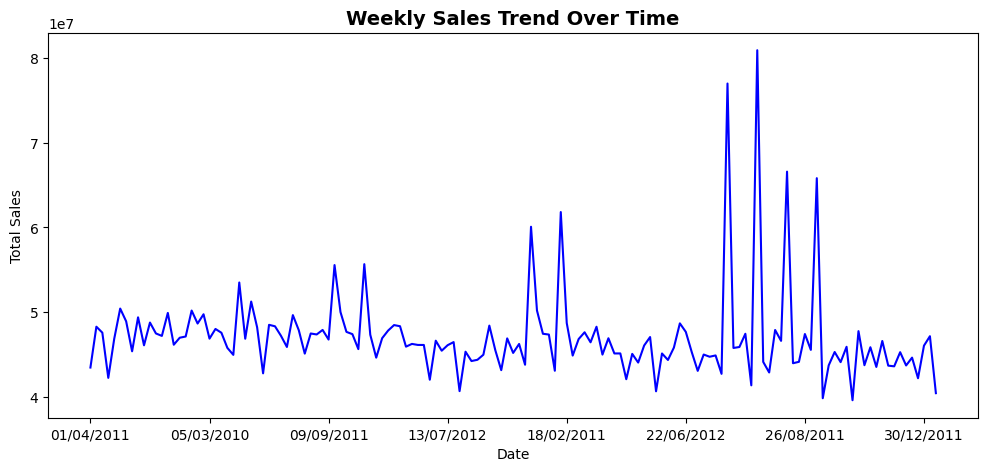

In [26]:
plt.figure(figsize=(12,5))
sales.groupby("Date")['Weekly_Sales'].sum().plot(color="blue")
plt.title("Weekly Sales Trend Over Time", fontsize=14, weight='bold')
plt.ylabel("Total Sales")
plt.show()


### **Insights:**

*  Spikes observed during holiday seasons like Thanksgiving and Christmas.

*  Some dips suggest seasonal slowdowns.

*  Confirms strong seasonality effect on sales.

# Chart - 5

### **(i) Countplot – Store Types**

Counts the number of stores by type (A, B, C).

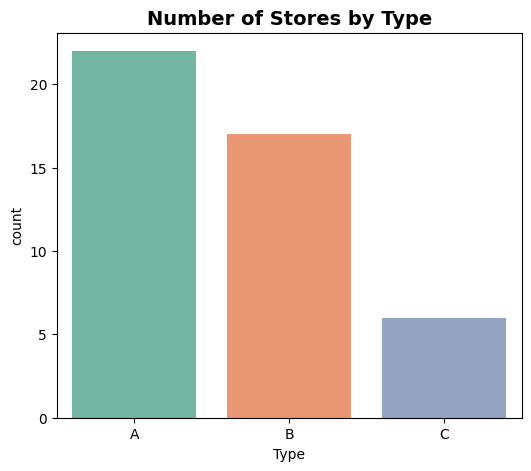

In [27]:
plt.figure(figsize=(6,5))
sns.countplot(x="Type", data=stores, hue ='Type',palette="Set2",legend=False)
plt.title("Number of Stores by Type", fontsize=14, weight='bold')
plt.show()

### **Insights:**

* Type A stores dominate → explains their higher contribution to overall sales.

* Type B and C are fewer, indicating company’s revenue is concentrated in fewer but larger stores.

### **(ii) Countplot – Holiday vs Non-Holiday Weeks**

Shows how many weeks are flagged as holidays.

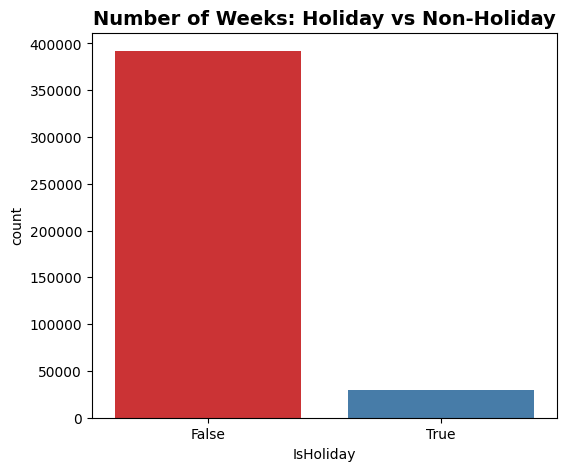

In [28]:
plt.figure(figsize=(6,5))
sns.countplot(x="IsHoliday", hue="IsHoliday", data=sales, palette="Set1", legend=False)
plt.title("Number of Weeks: Holiday vs Non-Holiday", fontsize=14, weight='bold')
plt.show()


### **Insights:**

* Non-holiday weeks dominate (~90% of data).

* Despite fewer occurrences, holiday weeks are critical because they generate 2x+ more sales.

* Confirms holiday promotions are a key revenue driver.

# Chart - 6

### **Scatter Plot – Sales vs Temperature**

This scatter plot shows the relationship between weekly sales and the average temperature during that week.

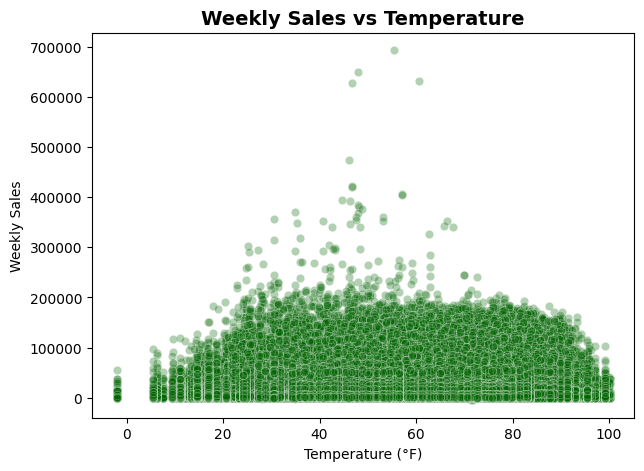

In [29]:
merged = sales.merge(features, on=["Store","Date"])
plt.figure(figsize=(7,5))
sns.scatterplot(x="Temperature", y="Weekly_Sales", data=merged, alpha=0.3, color="darkgreen")
plt.title("Weekly Sales vs Temperature", fontsize=14, weight='bold')
plt.xlabel("Temperature (°F)")
plt.ylabel("Weekly Sales")
plt.show()


### **Insights:**

* The relationship is not strongly linear → sales don’t steadily rise or fall with temperature.

* At extreme low or high temperatures, sales slightly dip → harsh weather may reduce footfall in stores.

* Moderate temperature ranges (around 60–75°F) still sustain stable sales.

# Chart - 7

### **Pairplot – Key Numerical Variables**

Visualizes relationships among Weekly Sales, Size, Temperature, Fuel Price, CPI, Unemployment.

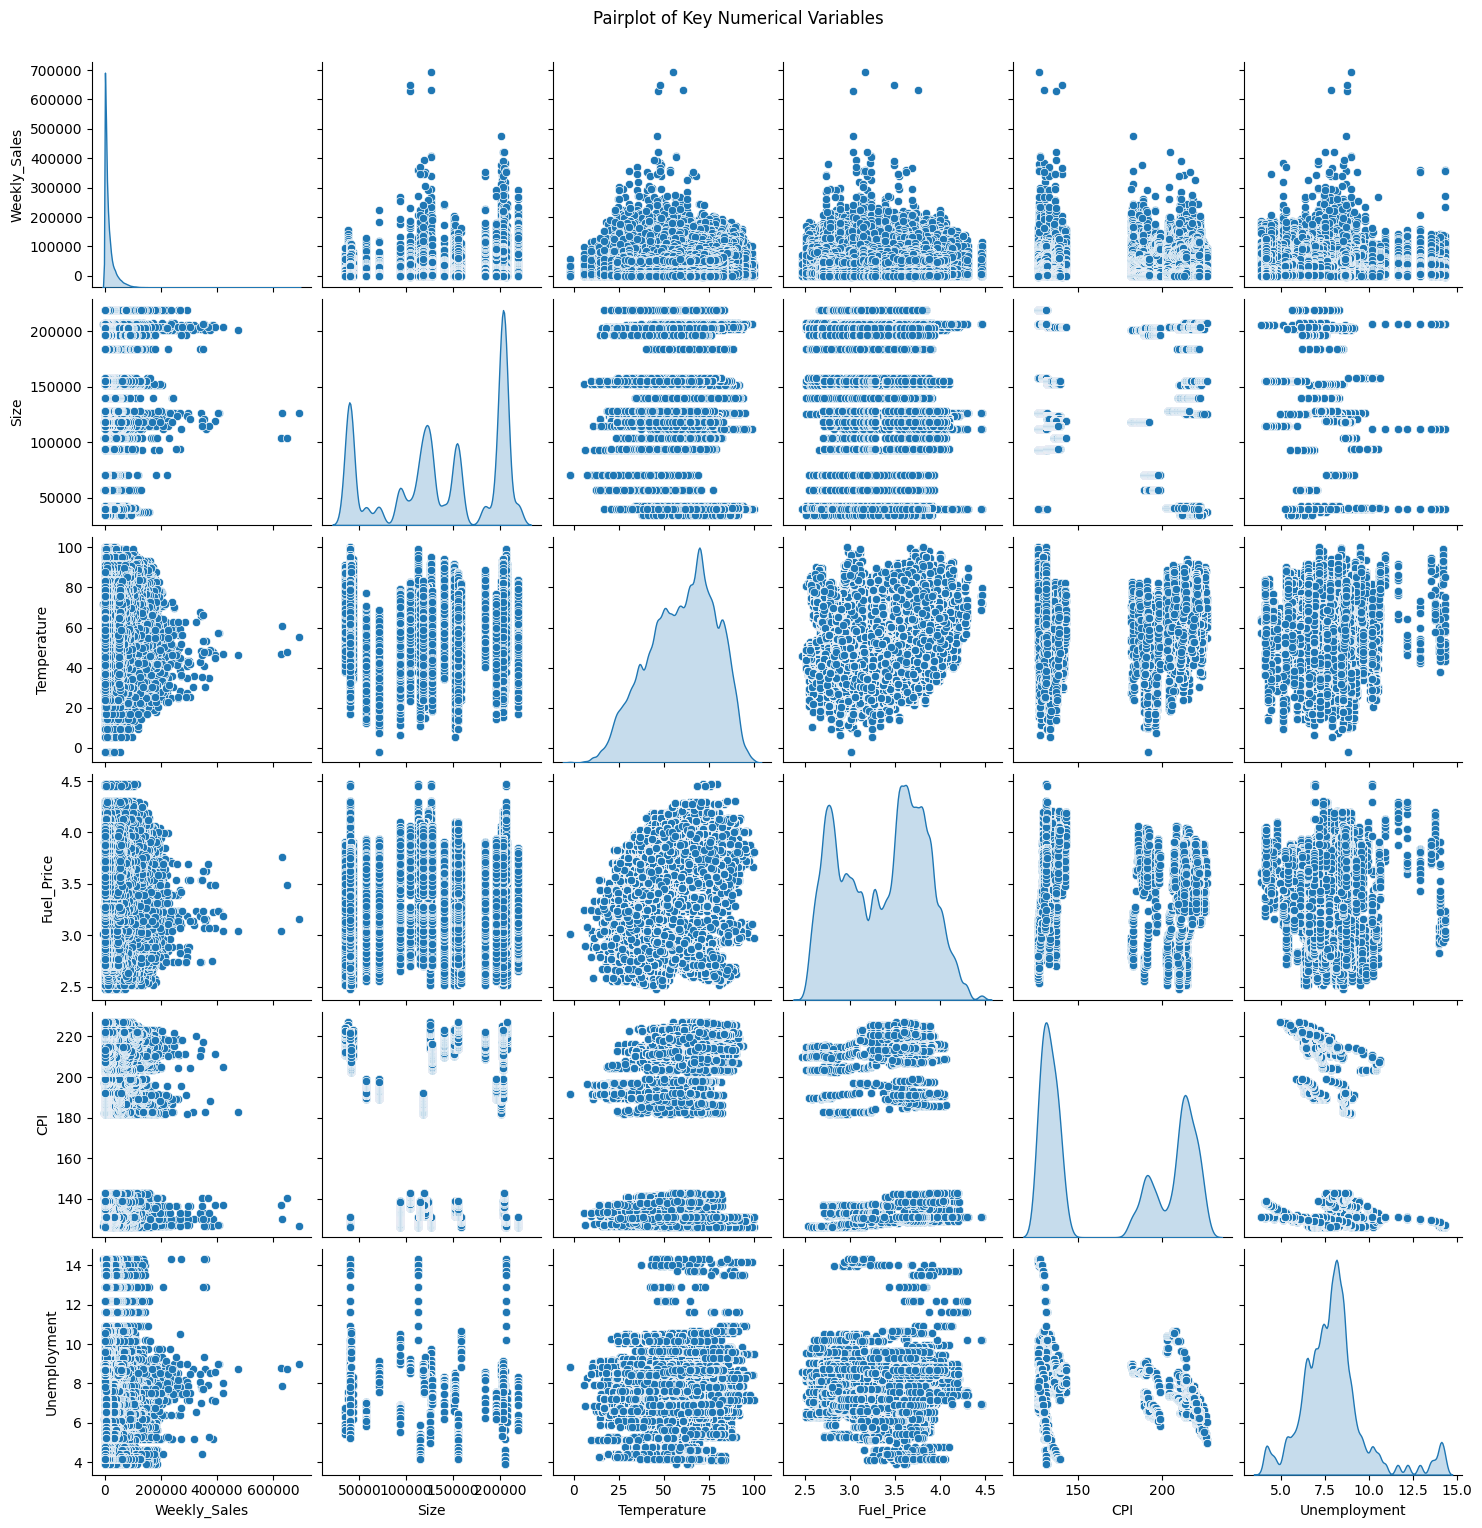

In [30]:
key_vars = ["Weekly_Sales", "Size", "Temperature", "Fuel_Price", "CPI", "Unemployment"]
sns.pairplot(df[key_vars].dropna(), diag_kind="kde")
plt.suptitle("Pairplot of Key Numerical Variables", y=1.02)
plt.show()

Insights:

* Clear positive relation between Size & Weekly Sales.

* Other variables show scattered, weak relations.

* Confirms store characteristics > macroeconomic features in sales prediction.

# Chart - 8

### **Violin Plot – Sales Distribution by Department**

Distribution of sales across the first 10 departments.

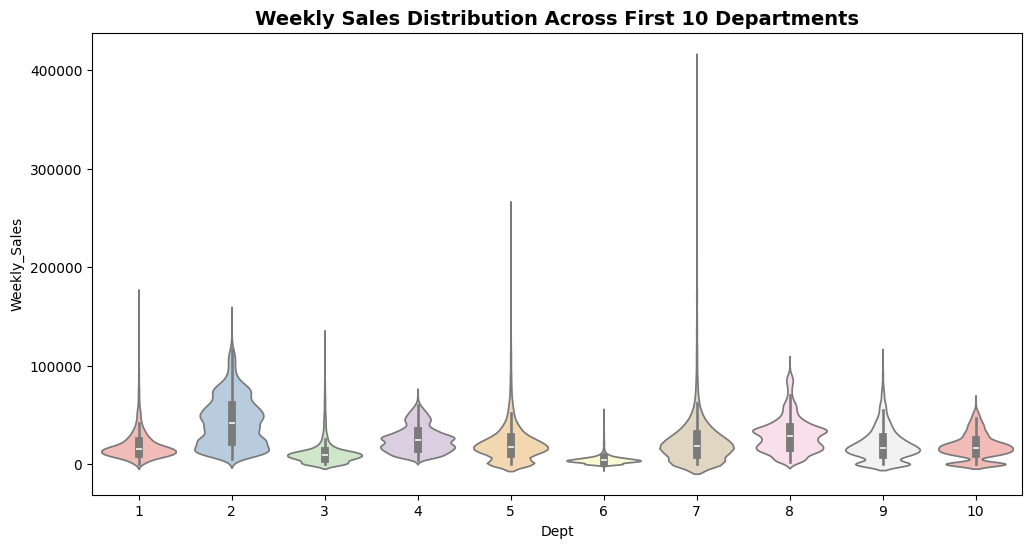

In [31]:
plt.figure(figsize=(12,6))
sns.violinplot(x="Dept", y="Weekly_Sales", hue="Dept",data=sales[sales['Dept'] <= 10], palette="Pastel1",legend=False)
plt.title("Weekly Sales Distribution Across First 10 Departments", fontsize=14, weight='bold')
plt.show()

### **Insights:**

* Some departments (like food/clothing) show higher, skewed sales.

* Others (e.g., specialty goods) have consistently low sales.

* Indicates department-level forecasting is crucial for inventory planning.

# Chart - 9

### **Correlation Heatmap**

The correlation heatmap shows linear relationships among variables.

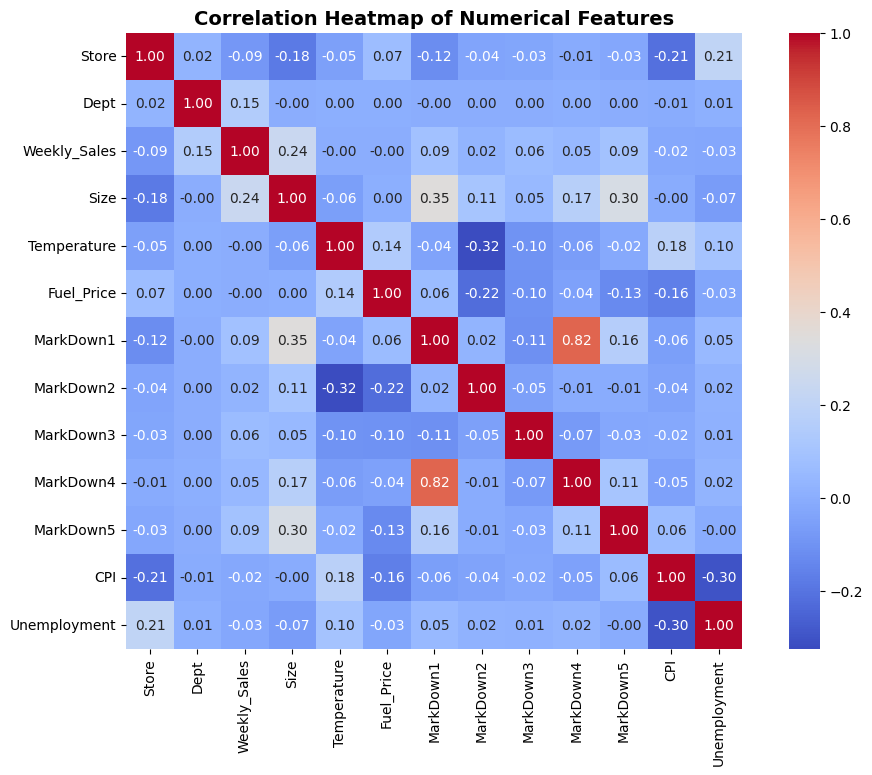

In [32]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).dropna(axis=1, how="all")
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, square=True)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14, fontweight='bold')
plt.show()

### **Insights:**

* Store Size has a strong positive correlation with Weekly Sales → bigger stores drive higher revenue.
* CPI & Unemployment are highly correlated with each other (as expected from economic indicators), but only weakly related to Weekly Sales.
* Fuel Price and Temperature show very low correlation with Weekly Sales → minimal direct impact.
* Markdowns (promotions) have moderate positive correlations with Weekly Sales, indicating promotional discounts help boost sales.

# **Conclusion**

The analysis of the integrated retail dataset highlights that store characteristics, promotional strategies, and holiday periods are the key drivers of sales performance. Larger stores consistently generate higher revenue, and holiday weeks significantly boost weekly sales, underscoring the importance of seasonal demand.

Promotional markdowns show a positive impact, making them an effective tool to stimulate customer spending. On the other hand, economic indicators such as fuel price, CPI, and unemployment have little direct influence on short-term sales.

Overall, retailers should focus on leveraging holiday demand, optimizing promotions, and strategically managing larger store formats to maximize sales and improve operational efficiency.

Use Cases :

* Holiday Planning & Inventory Management
* Customer Segmentation for Promotions
* Store Expansion Strategy
* Targeted Promotions
* Data-Driven Decision Making
